---
# **Palliative Care Concerns:**
Personal narratives, particularly those published on social media platforms such as Reddit, provide

genuine insights into the lived experiences of patients with palliative care needs and their carer

(family members and loved ones) who shoulder much of the caregiving burden. Using natural

language processing (NLP) tools like GPT-3.5, an advanced language model, this work extracts

and categorises the concerns expressed in these narratives. GPT-3.5’s ability to comprehend

and interpret human language offers a data-driven understanding of palliative care needs.

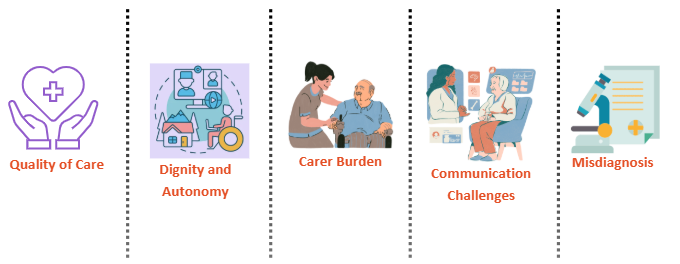

---

In [87]:
%pip install openai --upgrade

In [ ]:
import json
import pandas as pd

In [ ]:
import openai
import re
import getpass

openai.api_key = getpass.getpass("Please enter your OpenAI Key:")

Please enter your OpenAI Key:··········


In [ ]:
def complete(prompt):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
            "role": "user",
            "content": prompt
            }
        ],
    )
    return response.choices[0].message.content

complete("is this working?")

'Yes, it appears that everything is working fine. How can I assist you further?'

In [ ]:
data = """When my father entered the final stage of his illness, I felt completely overwhelmed. The hospital staff were kind, but I often wished there were better tools or systems in place to guide families like ours through this process. We had so many questions, and it felt like we were constantly searching online for answers we should have received in person.

One of the biggest struggles was just getting access to consistent palliative care. Some services were only available during the week, and weekends were especially hard. There were days when I didn’t know who to call or whether anyone would come.

I also found myself unprepared for what caring for someone at the end of life truly meant. I wish there had been more educational resources designed specifically for family carers—something clear, practical, and honest about what to expect.

Our extended family did their best to help, but most of the burden fell on me. I think more structured family support could have made a huge difference, even something as simple as check-ins from a care coordinator to keep everyone on the same page.

Emotionally, it was exhausting. Some days I held it together, but other days I broke down in the bathroom. I wish there had been more attention given to emotional support—not just for my dad, but for me and the rest of the family too. We needed someone to ask how *we* were doing, not just how he was.

Looking back, I know we did the best we could, but I also know it didn’t have to be this hard."""


---
#**Themes**

---

In [ ]:
themes = []
base_prompt = f"""Themes are recurring topics, ideas, or concepts that provide insight into shared experiences, emotions, and challenges faced by individuals affected by cancer.
                            Themes may include coping strategies (how individuals deal with challenges), emotional responses (feelings such as fear, resilience, or gratitude),
                            relationships and support (the role of family, friends, and healthcare providers), challenges and triumphs, meaning-making and resilience, and
                            healthcare experiences (interactions with the healthcare system).
                            Analyzing these themes can help understand the diverse experiences of cancer patients and inform tailored support and interventions.

                            Identify themes in the cancer narrative.

                            Narrative: {data}

                            Return the results as a JSON object in the following format:
                            - Label: theme category
                            - Evidence: [a comma separated list of all supporting sentences from the narrative]
                            - Related themes: [a comma separated list of closely related themes]"""

result = complete(base_prompt)
themes.append(result)

In [ ]:
themes

['{\n    "themes": [\n        {\n            "Label": "Challenges in the healthcare system",\n            "Evidence": [\n                "The hospital staff were kind, but I often wished there were better tools or systems in place to guide families like ours through this process.",\n                "There were days when I didn’t know who to call or whether anyone would come."\n            ],\n            "Related themes": ["Healthcare experiences"]\n        },\n        {\n            "Label": "Access to palliative care",\n            "Evidence": [\n                "One of the biggest struggles was just getting access to consistent palliative care.",\n                "Some services were only available during the week, and weekends were especially hard."\n            ],\n            "Related themes": ["Challenges and triumphs"]\n        },\n        {\n            "Label": "Lack of educational resources for family carers",\n            "Evidence": [\n                "I also found myself u

In [ ]:
dataframes_list = []

for i in range(len(themes)):
    data = json.loads(themes[i])
    if 'themes' in data.keys():
        dataframes_list.append(pd.DataFrame(data['themes']))
    elif 'results' in data.keys():
        dataframes_list.append(pd.DataFrame(data['results']))
    elif 'Themes' in data.keys():
        dataframes_list.append(pd.DataFrame(data['Themes']))

# Concatenate all DataFrames in the list
combined_df = pd.concat(dataframes_list, ignore_index=True)

In [ ]:
combined_df

,Label,Evidence,Related themes
0,Challenges in the healthcare system,"[The hospital staff were kind, but I often wis...",[Healthcare experiences]
1,Access to palliative care,[One of the biggest struggles was just getting...,[Challenges and triumphs]
2,Lack of educational resources for family carers,[I also found myself unprepared for what carin...,[Coping strategies]
3,Need for structured family support,"[Our extended family did their best to help, b...",[Relationships and support]
4,Emotional exhaustion and lack of emotional sup...,"[Emotionally, it was exhausting. Some days I h...",[Emotional responses]


---
# **Concerns**

---

In [ ]:
data = """My father was diagnosed with advanced pancreatic cancer after months of being misdiagnosed with acid reflux. We kept telling the doctors something was wrong, but they dismissed his weight loss and pain as stress. By the time we got the correct diagnosis, it was too late for curative treatment.

The palliative care team was kind, but it felt like they were always a step behind when it came to managing his pain. Some days, he’d be curled up in agony waiting for the next dose because the schedule didn’t match the intensity of his symptoms. I kept asking if there were other options, but no one gave us clear answers.

As his primary caregiver, I had to take time off work, manage his medications, coordinate appointments, and be emotionally available for him — all with very little support. There were no resources offered to help me cope or even to understand what to expect. I found a few educational materials online, but they were generic and hard to apply to our situation.

He wanted to die at home, surrounded by family, with dignity. But decisions about his care often happened without us. One day, he was transferred to a hospital without warning because of ‘protocol’. He cried that night, saying he felt like he had no control left.

It was also hard to get straight information from the healthcare team. Different nurses would tell us different things, and sometimes we felt like an inconvenience. I remember being brushed off when I mentioned his breathing had changed — only to be told two days later that it was a sign the end was near.

We felt alone most of the time. I wish we had more support tools, better pain control, and most of all, communication that acknowledged us — his family — as partners in his care."""

In [ ]:
concerns = []
base_prompt = f"""Patient concerns in healthcare refer to the specific issues, worries, or needs that individuals express regarding their health, care experiences, and overall well-being. These may include concerns about symptoms, diagnosis, quality of care, communication with healthcare providers, access to services, emotional support, dignity, and autonomy in decision-making.

Given the narrative below, identify the patient concerns expressed by the author. Focus on concerns that align with this definition — including medical, emotional, informational, or systemic issues related to their healthcare experience.

For each concern identified, provide:

                                Narrative: {data}

                                Return the results as a JSON object in the following format:
                                - Label: patient concern
                                - Evidence: [a comma separated list of all supporting sentences from the narrative]"""

result = complete(base_prompt)
concerns.append(result)

In [ ]:
concerns

['{\n    "concerns": [\n        {\n            "concern": "Misdiagnosis and delay in correct diagnosis",\n            "evidence": ["My father was diagnosed with advanced pancreatic cancer after months of being misdiagnosed with acid reflux.", "We kept telling the doctors something was wrong, but they dismissed his weight loss and pain as stress."]\n        },\n        {\n            "concern": "Pain management",\n            "evidence": ["it felt like they were always a step behind when it came to managing his pain.", "Some days, he’d be curled up in agony waiting for the next dose because the schedule didn’t match the intensity of his symptoms."]\n        },\n        {\n            "concern": "Lack of clear answers and options",\n            "evidence": ["I kept asking if there were other options, but no one gave us clear answers."]\n        },\n        {\n            "concern": "Limited support for caregiver",\n            "evidence": ["I had to take time off work, manage his medicat

In [ ]:
dataframes_list_concerns = []

for i in range(len(concerns)):
    data = json.loads(concerns[i])
    if 'concerns' in data.keys():
        dataframes_list_concerns.append(pd.DataFrame(data['concerns']))

combined_concerns_df = pd.concat(dataframes_list_concerns, ignore_index=True)

In [ ]:
combined_concerns_df

,concern,evidence
0,Misdiagnosis and delay in correct diagnosis,[My father was diagnosed with advanced pancrea...
1,Pain management,[it felt like they were always a step behind w...
2,Lack of clear answers and options,"[I kept asking if there were other options, bu..."
3,Limited support for caregiver,"[I had to take time off work, manage his medic..."
4,Loss of control over care decisions,[decisions about his care often happened witho...
5,Inconsistent communication and information,[Different nurses would tell us different thin...
6,Lack of support tools and resources,"[I wish we had more support tools, better pain..."
